In [184]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [185]:
edges = pd.read_csv('political-books-edges.csv')
nodes = pd.read_csv('political-books-nodes.csv')

G_books = nx.Graph()

for _, row in nodes.iterrows():
    G_books.add_node(row['Id'], label=row['Label'],
                     ideology=row['political_ideology'])

for _, row in edges.iterrows():
    G_books.add_edge(row['Source'], row['Target'], weight=row['Weight'])

print(f"Кількість вершин: {G_books.number_of_nodes()}")
print(f"Кількість ребер: {G_books.number_of_edges()}")

Кількість вершин: 105
Кількість ребер: 441


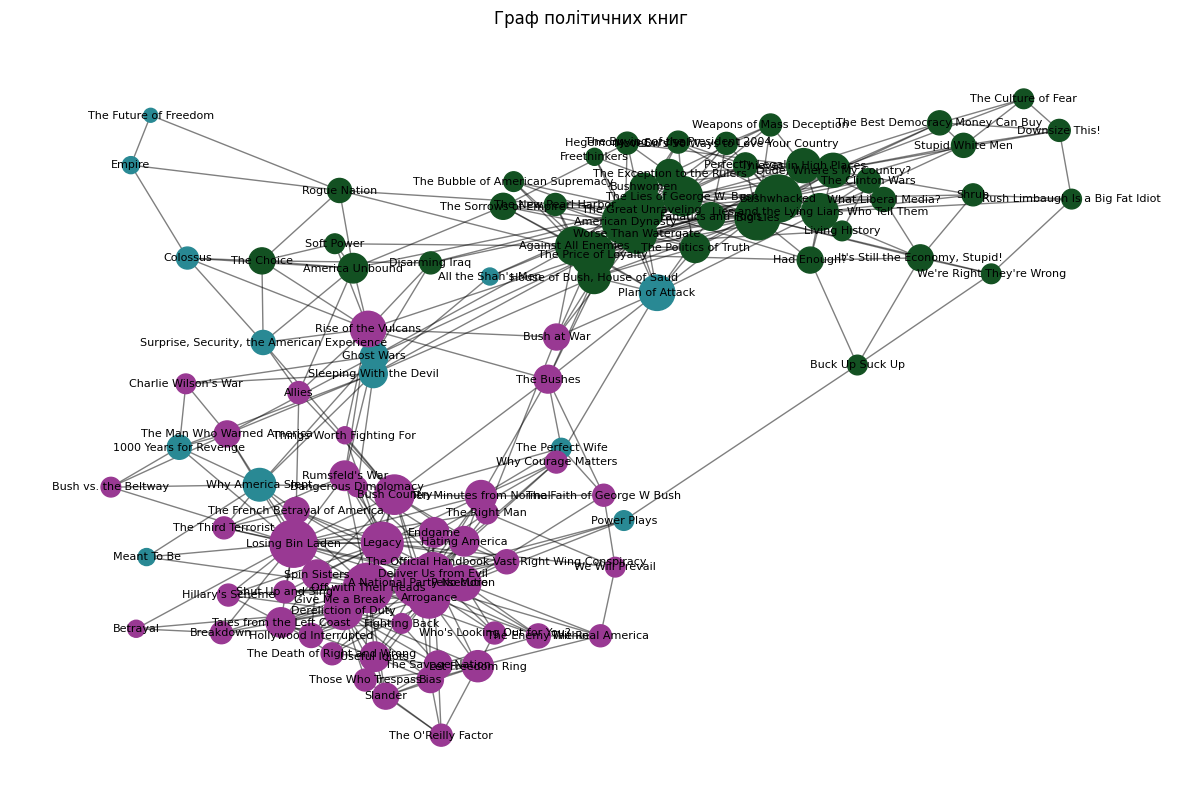

In [186]:
color_map = {
    'conservative': '#993993',
    'liberal': '#135122',
    'neutral': '#298994'
}
colors = [color_map[G_books.nodes[n]['ideology']] for n in G_books.nodes()]

degrees = dict(G_books.degree())

node_sizes = [v * 50 for v in degrees.values()]

plt.figure(figsize=(15, 10))

pos = nx.spring_layout(G_books, seed=42)
pos = {node: (x, -y) for node, (x, y) in pos.items()}
nx.draw_networkx_nodes(G_books, pos, node_size=node_sizes, node_color=colors)
nx.draw_networkx_edges(G_books, pos, alpha=0.5)
nx.draw_networkx_labels(G_books, pos, labels={
                        n: G_books.nodes[n]['label'] for n in G_books.nodes()}, font_size=8)
plt.title("Граф політичних книг")
plt.axis('off')
plt.show()

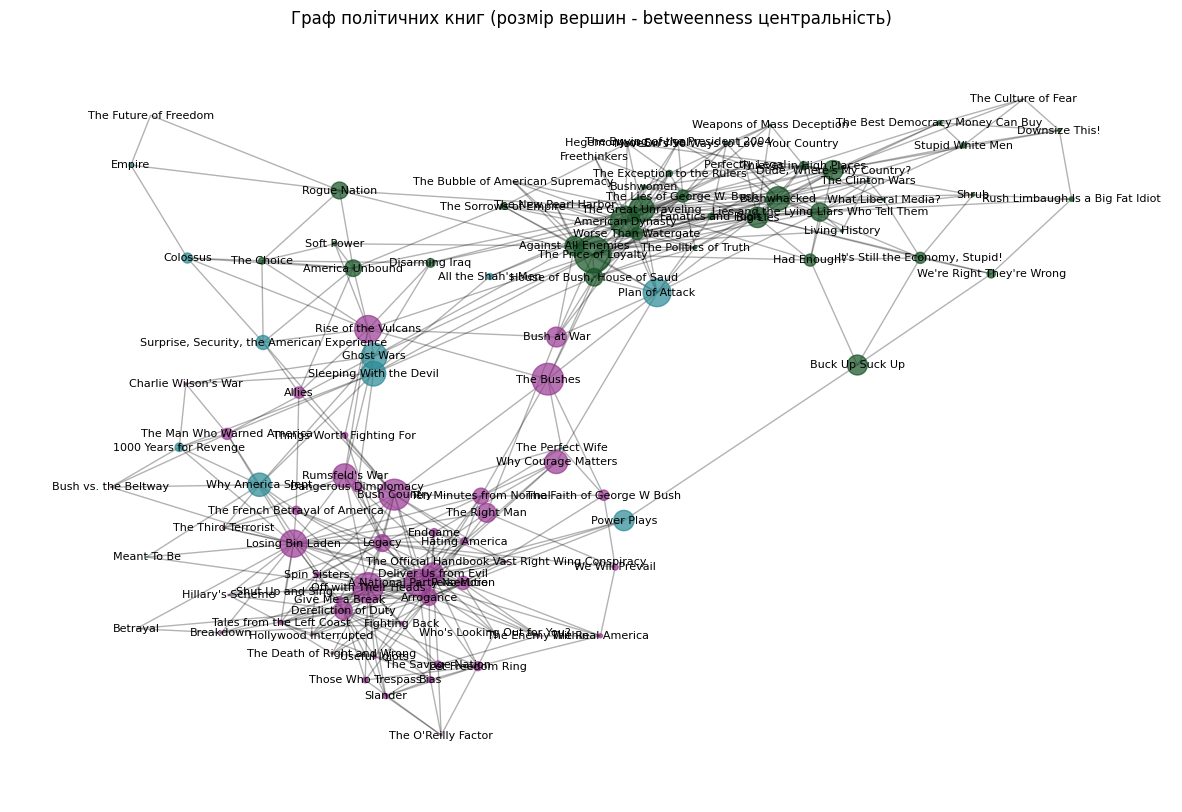

In [187]:

betweenness_centrality = nx.betweenness_centrality(G_books)


plt.figure(figsize=(15, 10))
node_sizes = [v * 5000 for v in betweenness_centrality.values()]
nx.draw_networkx_nodes(G_books, pos, node_size=node_sizes, node_color=colors, alpha=0.7)
nx.draw_networkx_edges(G_books, pos, alpha=0.3)
nx.draw_networkx_labels(G_books, pos, labels={n: G_books.nodes[n]['label'] for n in G_books.nodes()}, font_size=8)
plt.title("Граф політичних книг (розмір вершин - betweenness центральність)")
plt.axis('off')
plt.show()

In [188]:
nodes_dining = pd.read_csv('Dining-table_partners [Nodes].csv')
edges_dining = pd.read_csv('Dining-table_partners [Edges].csv')

G_dining = nx.DiGraph()

for _, row in nodes_dining.iterrows():
    G_dining.add_node(row['Id'], label=row['Label'])

for _, row in edges_dining.iterrows():
    G_dining.add_edge(row['Source'], row['Target'], weight=row['Weight'])

print(f"Кількість вершин: {G_dining.number_of_nodes()}")
print(f"Кількість ребер: {G_dining.number_of_edges()}")

Кількість вершин: 26
Кількість ребер: 52


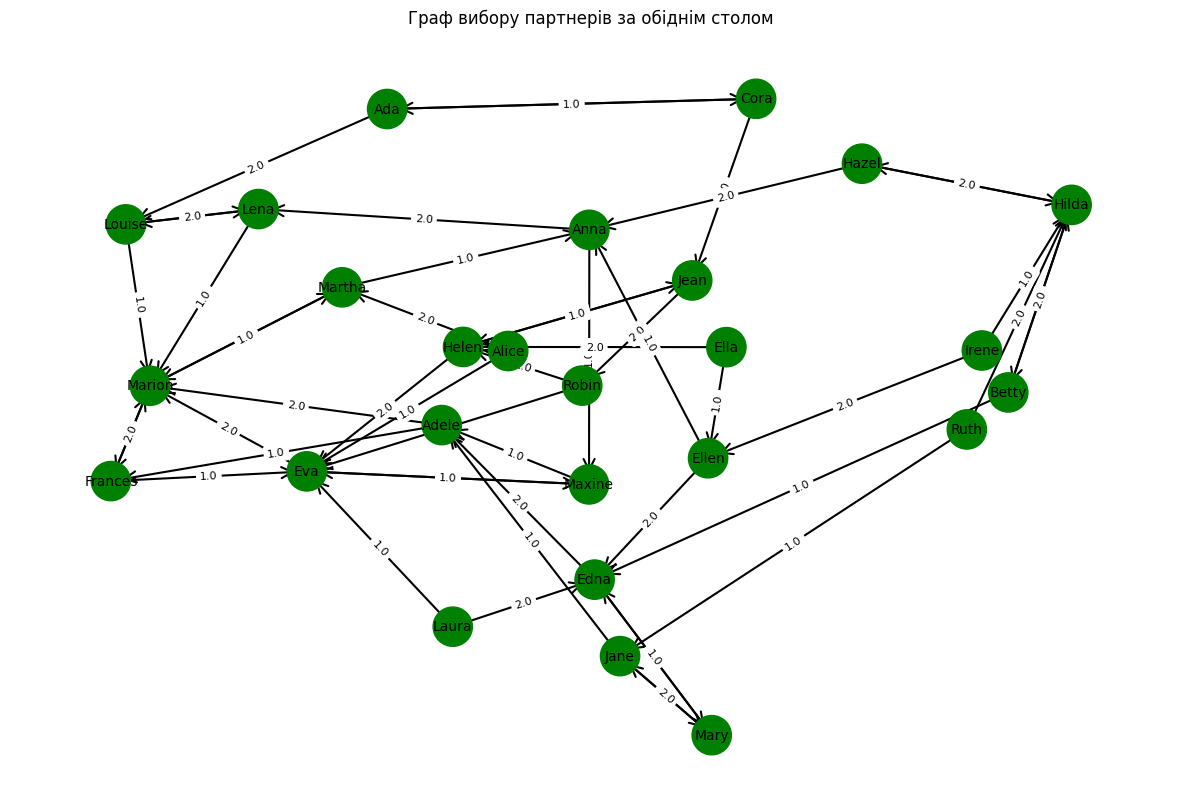

In [189]:
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G_dining, seed=42)
pos = {node: (x, -y) for node, (x, y) in pos.items()}

colors = ['green' for _ in G_dining.nodes()]

nx.draw_networkx_nodes(G_dining, pos, node_color=colors, node_size=800)
nx.draw_networkx_edges(G_dining, pos, arrowstyle='->', arrowsize=20, width=1.5)
nx.draw_networkx_labels(G_dining, pos, labels={
                        n: G_dining.nodes[n]['label'] for n in G_dining.nodes()}, font_size=10)

edge_labels = {(u, v): d['weight'] for u, v, d in G_dining.edges(data=True)}
nx.draw_networkx_edge_labels(
    G_dining, pos, edge_labels=edge_labels, font_size=8)

plt.title("Граф вибору партнерів за обіднім столом")
plt.axis('off')
plt.show()

In [193]:
in_degrees = dict(G_dining.in_degree(weight='weight'))
print(in_degrees)
best_partner = max(in_degrees.items(), key=lambda x: x[1])
best_partner_id, best_partner_score = best_partner
best_partner_name = G_dining.nodes[best_partner_id]['label']

print(f"Найкраща сусідка за столом: {best_partner_name} (ID: {best_partner_id})")
print(f"Кількість виборів: {best_partner_score}")

{1: 1.0, 2: 1.0, 3: 4.0, 4: 3.0, 5: 5.0, 6: 3.0, 7: 0, 8: 2.0, 9: 10.0, 10: 2.0, 11: 4.0, 12: 2.0, 13: 6.0, 14: 3.0, 15: 8.0, 16: 0, 17: 6.0, 18: 4.0, 19: 3.0, 20: 4.0, 21: 3.0, 22: 1.0, 23: 0, 24: 3.0, 25: 0, 26: 0}
Найкраща сусідка за столом: Marion (ID: 9)
Кількість виборів: 10.0


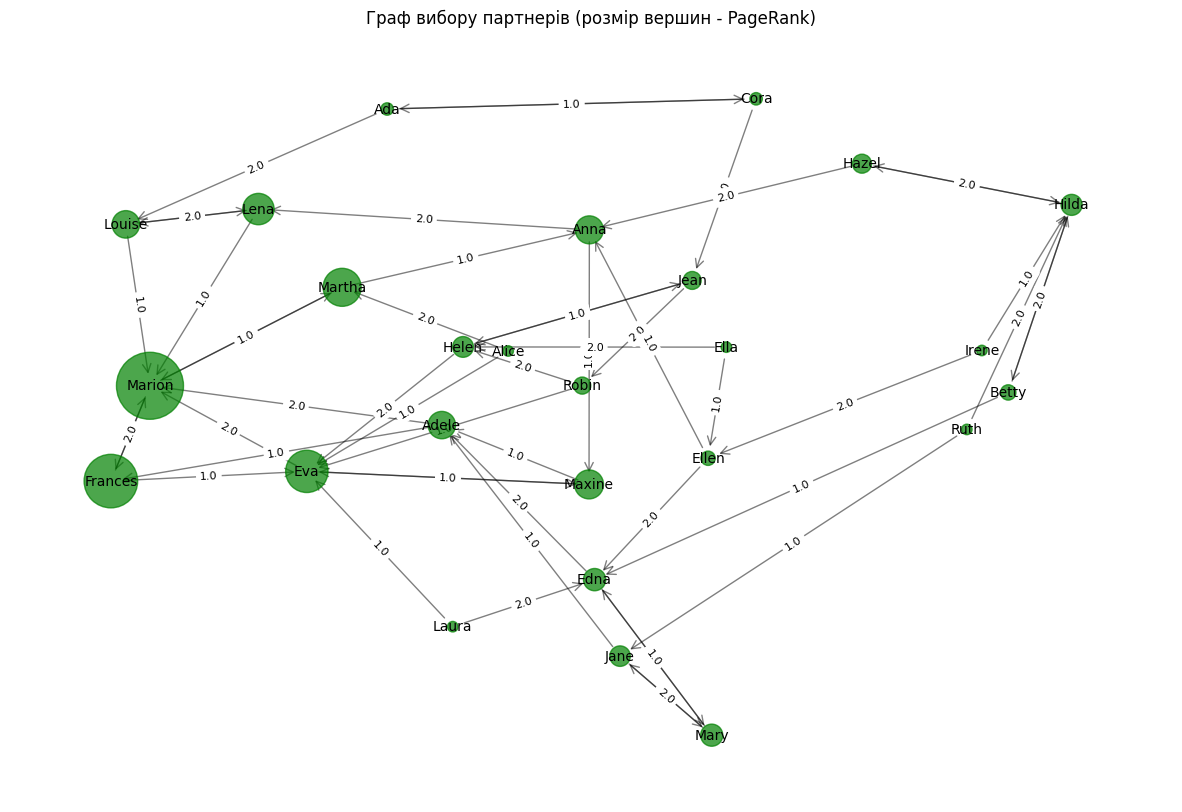

In [192]:
pagerank = nx.pagerank(G_dining)

plt.figure(figsize=(15, 10))
node_sizes = [v * 10000 for v in pagerank.values()]
nx.draw_networkx_nodes(G_dining, pos, node_size=node_sizes, node_color="green", alpha=0.7)
nx.draw_networkx_edges(G_dining, pos, arrowstyle='->', arrowsize=15, width=1, alpha=0.5)
nx.draw_networkx_labels(G_dining, pos, labels={n: G_dining.nodes[n]['label'] for n in G_dining.nodes()}, font_size=10)


edge_labels = {(u, v): d['weight'] for u, v, d in G_dining.edges(data=True)}
nx.draw_networkx_edge_labels(
    G_dining, pos, edge_labels=edge_labels, font_size=8)

plt.title("Граф вибору партнерів (розмір вершин - PageRank)")
plt.axis('off')
plt.show()